# 大作业

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import FEM as fem

In [2]:
P = 10e3
a = 100e-2
f = 20e-4
E = 7e6 * 10**4
mu = 0.3

In [3]:
nodeList = list()

for i in range(4):
    tmp1 = fem.Node(0 , i * a , Px = 0 , Py = 0)
    tmp2 = fem.Node(a , i * a , Px = 0 , Py = 0)
    nodeList.append(tmp1)
    nodeList.append(tmp2)
    pass

nodeList.append( fem.Node(a , 4*a , Px = 0 , Py = 0) )

for i in range(5):
    tmp1 = fem.Node( (2 + i) * a , 3 * a , Px = 0 , Py = 0)
    tmp2 = fem.Node( (2+i) * a , 4 * a , Px = 0 , Py = 0)
    nodeList.append(tmp1)
    nodeList.append(tmp2)
    pass

nodeList.append( fem.Node(7 * a , 3 * a , Px = 0 , Py = 0) )

for i in range(3):
    tmp1 = fem.Node( 6 * a , (2 - i) * a , Px = 0 , Py = 0)
    tmp2 = fem.Node( 7*a , (2 - i) * a , Px = 0 , Py = 0)
    nodeList.append(tmp1)
    nodeList.append(tmp2)
    pass

sys = fem.SysPole(nodeList)

for i in [1 , 2 , 25 , 26]:
    sys.setUV(i , u = 0 , v = 0)
    sys.setP(i , Px = np.NaN , Py = np.NaN)
    pass

for i in [13 , 15]:
    sys.setP(i , Px = 0 , Py = - P)
    pass

del i , tmp1 , tmp2

successfully build system !


In [4]:
for i in [1 , 3 , 5 , 8 , 10 , 12 , 14 , 16]:
    sys.connect(i , i+2 , E , f)
    sys.connect(i , i+3 , E , f)
    sys.connect(i+1 , i+2 , E , f)
    sys.connect(i+1 , i+3 , E , f)
    sys.connect(i+2 , i+3 , E , f)
    pass

for i in [26 , 24]:
    sys.connect(i-2 , i , E , f)
    sys.connect(i-3 , i , E , f)
    sys.connect(i-2 , i-1 , E , f)
    sys.connect(i-3 , i-1 , E , f)
    sys.connect(i-3 , i-2 , E , f)
    pass

sys.connect(7 , 9 , E , f)
sys.connect(8 , 9 , E , f)
sys.connect(19 , 20 , E , f)
sys.connect(18 , 20 ,E , f)
sys.connect(18 , 22 , E , f)
sys.connect(18 , 21 , E , f)
sys.connect(20 , 22 , E , f)
sys.connect(20 , 21 , E , f)

del i

sys.generate()

successfully get matrix K !


In [5]:
sys.solve()

successfully update node infomation !


successfully write to file hw.txt !


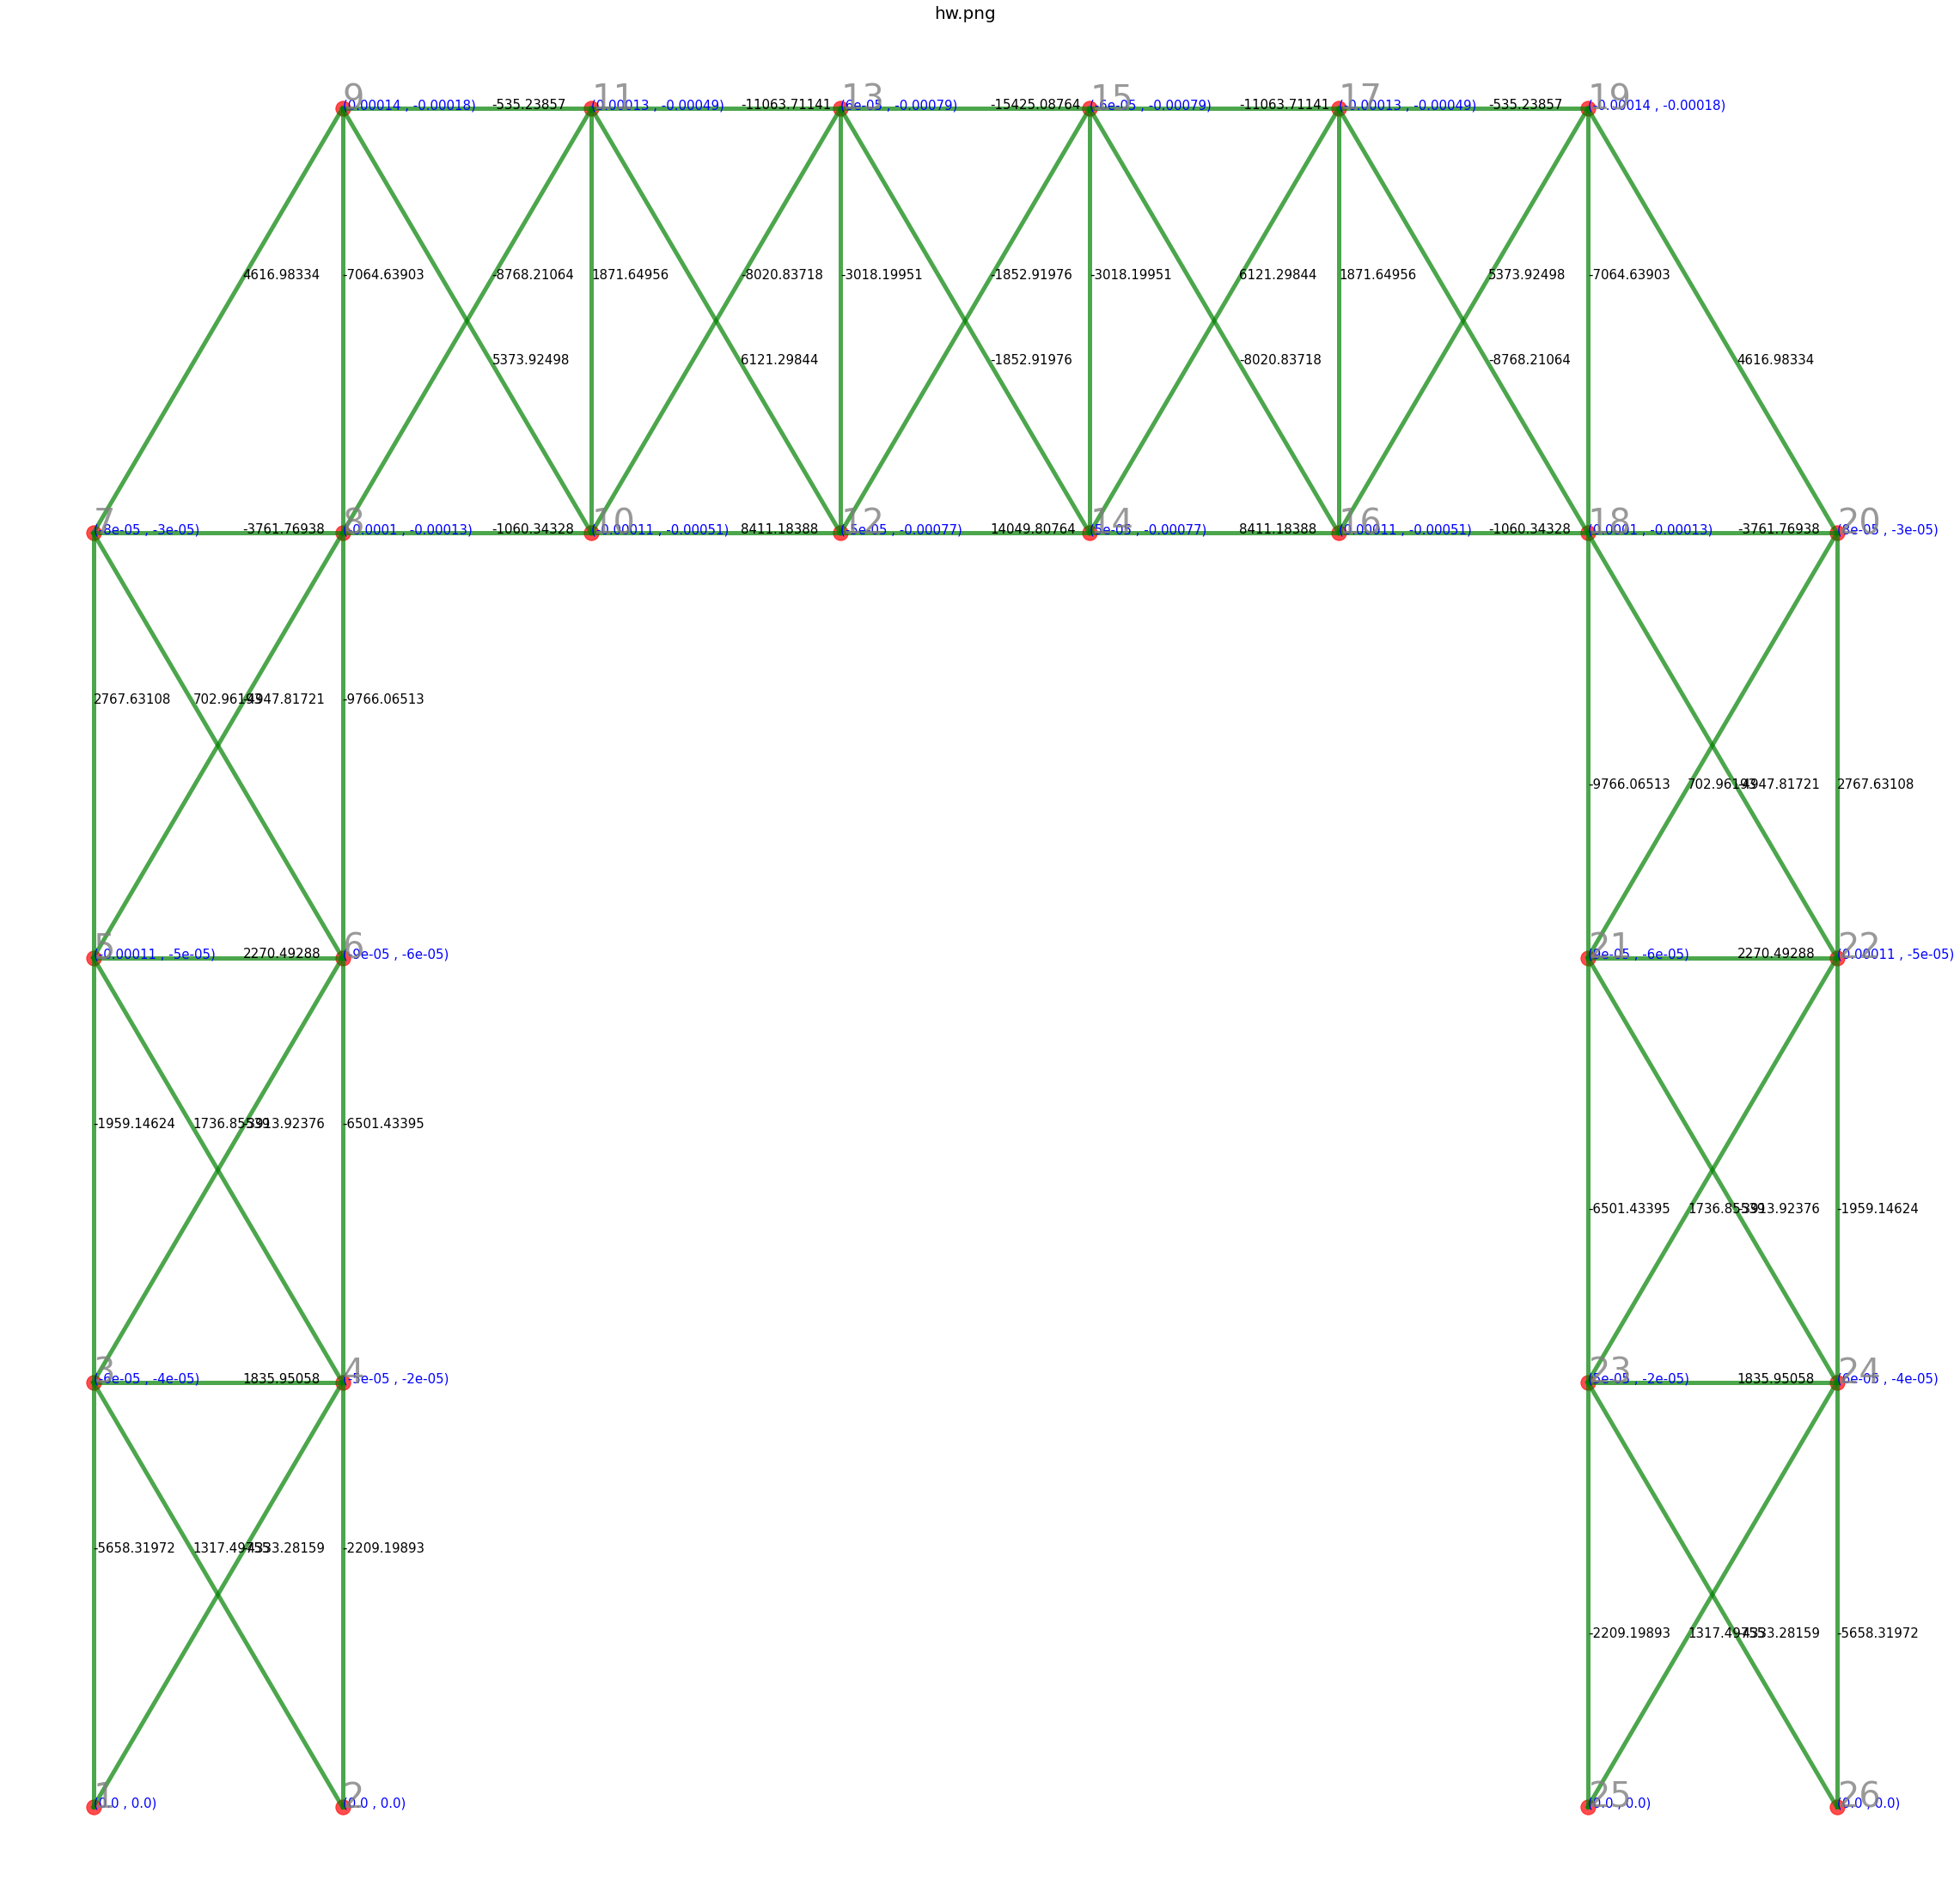

In [6]:
sys.export('hw.txt' , 'hw.png')